In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

Make 2D plot of chi squared of spurious signal owing to photo-z uncertainty as a function of $\Delta z$ and $\sigma_z$.

In [53]:
#sigz = np.linspace(0.01,0.1,10)
#delz = np.linspace(-0.05,0.05,11)

# Note the first sigz point is not linearly spaced so should not really be used for plotting atm

sigz = [0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
delz = [-0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, 
        -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

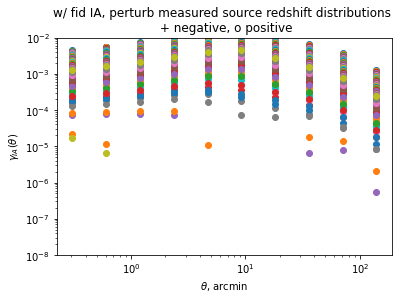

In [54]:
# Load data vectors for each case and get the signal to noise.
# Load the covariance in order to do this
data_cov = np.load('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/CovMat.npy')
inv_data_cov = np.linalg.inv(data_cov)
gamma_IA_fid = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/GammaIA')

plt.figure()
chisquared = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_measured-redshifts-wrong_variableF_Planck18pars_sigma='+str(sigz[si])+'deltaz='+str(delz[di])+'.txt', unpack=True)
        plt.loglog(theta, -1.0*data_vec, 'o', label='$\delta z$='+str(delz[di])+', $\sigma$='+str(sigz[si]))
        diff = data_vec - gamma_IA_fid
        #print("data_vec=", data_vec)
        #print("gamma_IA_fid=", gamma_IA_fid)
        #print(diff)
        #chisquared_cut[di, si] = np.dot(diff[1:],np.dot(inv_data_cov_cut,diff[1:]))
        chisquared[di, si] = np.dot(diff,np.dot(inv_data_cov,diff))
plt.ylabel('$\gamma_{IA}(\\theta)$')
plt.xlabel('$\\theta$, arcmin')
plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')
plt.ylim(10**(-8),10**(-2))
#plt.legend()
#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')
#plt.close()
plt.show()


In [52]:
gamma_IA_fid

array([-4.56157797e-03,  4.51804264e-04,  1.56239517e-04,  2.37917536e-03,
        3.38634446e-03,  2.05644200e-03,  1.19820253e-03,  4.94697841e-05,
        7.97305965e-05,  2.49786841e-05])

In [55]:
# Set the number of degrees of freedom for the chisquared test. Here it is the number of data points I think.
ndatapts = len(diff)
DOF = ndatapts

In [12]:
delz[18:]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

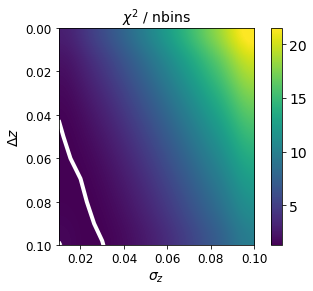

In [6]:
# Plot the chi squared divided by the number of degrees of freedom as a function of the photo-z params.
# As a rough estimate, where this is close to 1 the fit is pretty good.
plt.figure()
plt.imshow(chisquared[18:,:]/DOF, extent = [0.01, 0.1, 0.1, 0.],interpolation='spline36')#, aspect=2.0/3.0)
#plt.imshow(chisquared/DOF, extent = [0.01, 0.1, 0.1, -0.18],interpolation='spline36')#, aspect=2.0/3.0)
plt.xlabel('$\sigma_z$', fontsize=14)
plt.ylabel('$\Delta z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('$\chi^2$ / nbins', fontsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#plt.contour(sigz, delz, chisquared/DOF, [1.5], colors='#FFFFFF', linewidths=4)
plt.contour(sigz, delz[18:], chisquared[18:,:]/DOF, [1.5], colors='#FFFFFF', linewidths=4)
#plt.savefig('./reduced_chisq_w1halo_variableF_Planck18.png')
plt.show()

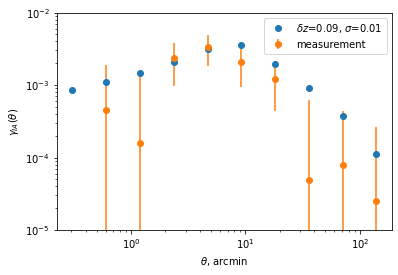

In [7]:
# Plot one of the theory vectors in the 'decent fit' range alongside the data vector and covariance
# Just to make sure it looks okay

plt.figure()
theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_measured-redshifts-wrong_variableF_Planck18pars_sigma=0.01deltaz=0.09.txt', unpack=True)
plt.loglog(theta, data_vec, 'o', label='$\delta z$=0.09, $\sigma$=0.01')
plt.errorbar(theta, gamma_IA_fid, yerr = np.sqrt(np.diag(data_cov)), marker='o',ls='none',label='measurement')
plt.ylabel('$\gamma_{IA}(\\theta)$')
plt.xlabel('$\\theta$, arcmin')
#plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')
plt.ylim(10**(-5),10**(-2))
plt.legend()
plt.yscale('log')
#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')
#plt.close()
plt.show()

In [ ]:
# We would really like to be more precise than the above chi-square / DOF.
# Really, we want to look at a chi squared distribution with the correct number of degrees of freedom
# And calculate the probability that each of our photo-z uncertainty models are drawn from this distribution.

In [8]:
# What we want is the CDF value at the chi square given by each of our parameter choices.
# What this tells us is the probability that, given our pz-uncertainty model with given sigz and delz is correct, 
# we would have got the chi square we got or a lower chi squared (fixing our measured data vector and cov).
# Eg if CDF = 0.95, this means that if our model is correct, 95% of the time the chi squared would have been lower.
# If we care about the model and the data agreeing within 1 sigma, we look for the case where CDF=0.68 or less
# i.e. the case where if our model is correct, 68% of the time we would have drawn a lower chi-squared. 

cdf_grid = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        cdf_grid[di,si] = chi2.cdf(chisquared[di, si], DOF)

<ipython-input-9-02a2685b4b91>:12: UserWarning: No contour levels were found within the data range.
  plt.contour(sigz, delz, cdf_grid, [0.68], colors='#FFFFFF', linewidths=4)


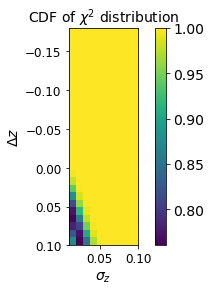

In [9]:
# Plot the cdf as a function of photo-z params
plt.figure()
#plt.imshow(cdf_grid[8:19,:], extent = [0.01, 0.1, 0, -0.1])#, aspect=2.0/3.0)
plt.imshow(cdf_grid, extent = [0.01, 0.1, 0.1, -0.18])#, aspect=2.0/3.0)
plt.xlabel('$\sigma_z$', fontsize=14)
plt.ylabel('$\Delta z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('CDF of $\chi^2$ distribution', fontsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.contour(sigz, delz, cdf_grid, [0.68], colors='#FFFFFF', linewidths=4)
#plt.savefig('./pvalues_w1halo_variableF_Planck18.png')
plt.show()

In [33]:
# All of our models are rejected at the 1-sigma level (CDF is never as low as 0.68 for our models.)
# What about 2-sigma? This is the 95% confidence interval, so we look to CDF=0.95

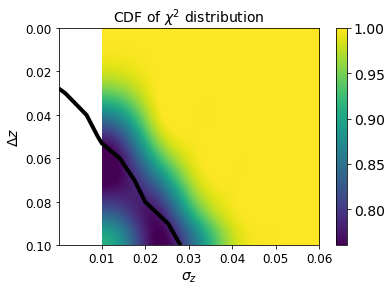

In [56]:
# Plot the cdf as a function of photo-z params
plt.figure()
#plt.imshow(cdf_grid[8:19,:], extent = [0.01, 0.1, 0, -0.1])#, aspect=2.0/3.0)
plt.imshow(cdf_grid[18:,0:6], extent = [0.01, 0.06, 0.1,0.0], interpolation='spline36',aspect=0.5)
plt.xlabel('$\sigma_z$', fontsize=14)
plt.ylabel('$\Delta z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('CDF of $\chi^2$ distribution', fontsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.contour(sigz[0:6], delz[18:], cdf_grid[18:,0:6], [0.95], colors='k', linewidths=4)
plt.savefig('./cdf_w1halo_variableF_Planck18_95pcline.png')
#plt.show()

In [46]:
# So there are some regions where our model is acceptable within 2sigma, at higher derz and very low sigz.

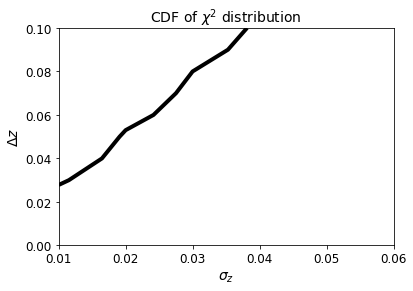

In [11]:
# Plot the cdf as a function of photo-z params
plt.figure()
#plt.imshow(cdf_grid[8:19,:], extent = [0.01, 0.1, 0, -0.1])#, aspect=2.0/3.0)
#plt.imshow(cdf_grid[18:,0:6], extent = [0.01, 0.06, 0.1,0.0], interpolation='spline36',aspect=0.6)
plt.xlabel('$\sigma_z$', fontsize=14)
plt.ylabel('$\Delta z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('CDF of $\chi^2$ distribution', fontsize=14)
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=14)
plt.contour(sigz[0:6], delz[18:], cdf_grid[18:,0:6], [0.95], colors='k', linewidths=4)
#plt.savefig('./pvalues_w1halo_variableF_Planck18.png')
plt.show()

In [ ]:
#plt.imshow(chisquared_cut/DOF_cut, extent = [0.01, 0.1, 0.0, -0.18])
#plt.xlabel('$\sigma_z$')
#plt.ylabel('$\Delta z$')
#plt.title('Reduced $\chi^2$ (omit smallest angle data point)')
#plt.colorbar()
#plt.savefig('./reduced_chisq_cutdvec.png')

In [ ]:
show_bad_regions = np.zeros((len(delz), len(sigz)))
show_bad_regions_cut = np.zeros((len(delz), len(sigz)))
for zi in range(len(delz)):
    for si in range(len(sigz)):
        if (chisquared[zi, si] / DOF > 1.5):
            show_bad_regions[zi,si]=0.0
        else:
            show_bad_regions[zi,si] = chisquared[zi,si] / DOF
            
#for zi in range(len(delz)):
#    for si in range(len(sigz)):
#        if (chisquared_cut[zi, si] / DOF_cut > 1.0):
#            show_bad_regions_cut[zi,si]=0.0
#        else:
#            show_bad_regions_cut[zi,si] = chisquared_cut[zi,si] / DOF_cut
            

In [ ]:
plt.imshow(show_bad_regions, extent = [0.01, 0.1, 0.1, -0.18])
plt.title('Yellow region has reduced $\chi^2<1.5$')
plt.xlabel('$\sigma_z$')
plt.ylabel('$\Delta z$')
plt.colorbar()
plt.tight_layout()
plt.savefig('./confusion_region_fulldvec_shift_one_sample_w1halo_variableF.png')

In [ ]:
#plt.imshow(show_bad_regions_cut, extent = [0.01, 0.1, 0.0, -0.18])
#plt.title('Non-zero region has reduced $\chi^2<1$ (cut data vector)')
#plt.xlabel('$\sigma_z$')
#plt.ylabel('$\Delta z$')
#plt.colorbar()
#plt.savefig('./confusion_region_cutdvec.png')

We are interested in also considering the case where we find the best-fit pz parameters for just the positive data points (all but the first one) and just the negative data points (the first one).

In [57]:
gamma_IA_pos = gamma_IA_fid[1:]
data_cov_pos = data_cov[1:,1:]
inv_data_cov_pos = np.linalg.inv(data_cov_pos)

In [58]:
#plt.figure()
chisquared_pos = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_measured-redshifts-wrong_variableF_Planck18pars_sigma='+str(sigz[si])+'deltaz='+str(delz[di])+'.txt', unpack=True)
        theta_pos = theta[1:]
        data_vec_pos = data_vec[1:]
        #plt.loglog(theta, -1.0*data_vec, 'o', label='$\delta z$='+str(delz[di])+', $\sigma$='+str(sigz[si]))
        diff = data_vec_pos - gamma_IA_pos
        #print("data_vec=", data_vec)
        #print("gamma_IA_fid=", gamma_IA_fid)
        #print(diff)
        #chisquared_cut[di, si] = np.dot(diff[1:],np.dot(inv_data_cov_cut,diff[1:]))
        chisquared_pos[di, si] = np.dot(diff,np.dot(inv_data_cov_pos,diff))
#plt.ylabel('$\gamma_{IA}(\\theta)$')
#plt.xlabel('$\\theta$, arcmin')
#plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')
#plt.ylim(10**(-8),10**(-2))
#plt.legend()
#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')
#plt.close()
#plt.show()

In [59]:
DOF_pos = DOF-1

In [60]:
cdf_grid_pos = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        cdf_grid_pos[di,si] = chi2.cdf(chisquared_pos[di, si], DOF_pos)

In [61]:
ind_min_pos = np.where(cdf_grid_pos == np.amin(cdf_grid_pos))

In [62]:
cdf_grid_pos[ind_min_pos]

array([0.01918486])

In [63]:
# Thesea are then the best fit pz parameters in the range.
print(delz[ind_min_pos[0][0]])
print(sigz[ind_min_pos[1][0]])

0.03
0.0001


In [70]:
cdf_grid_pos

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.

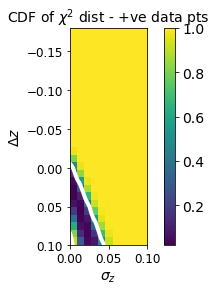

In [71]:
# Plot the cdf as a function of photo-z params
plt.figure()
#plt.imshow(cdf_grid[8:19,:], extent = [0.01, 0.1, 0, -0.1])#, aspect=2.0/3.0)
plt.imshow(cdf_grid_pos, extent = [0.0, 0.1, 0.1, -0.18])#, aspect=2.0/3.0)
plt.xlabel('$\sigma_z$', fontsize=14)
plt.ylabel('$\Delta z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('CDF of $\chi^2$ dist - +ve data pts', fontsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.contour(sigz, delz, cdf_grid_pos, [0.68], colors='#FFFFFF', linewidths=4)
#plt.savefig('./pvalues_w1halo_variableF_Planck18.png')
plt.show()

In [72]:
gamma_IA_neg = gamma_IA_fid[0]
data_cov_neg = data_cov[0,0]
inv_data_cov_neg = 1./data_cov_neg

In [73]:
#plt.figure()
chisquared_neg = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_DESY1_no_fidIA_measured-redshifts-wrong_variableF_Planck18pars_sigma='+str(sigz[si])+'deltaz='+str(delz[di])+'.txt', unpack=True)
        theta_neg = theta[0]
        data_vec_neg = data_vec[0]
        #plt.loglog(theta, -1.0*data_vec, 'o', label='$\delta z$='+str(delz[di])+', $\sigma$='+str(sigz[si]))
        diff = data_vec_neg - gamma_IA_neg
        #print("data_vec=", data_vec)
        #print("gamma_IA_fid=", gamma_IA_fid)
        #print(diff)
        #chisquared_cut[di, si] = np.dot(diff[1:],np.dot(inv_data_cov_cut,diff[1:]))
        chisquared_neg[di, si] = diff**2 * inv_data_cov_neg
#plt.ylabel('$\gamma_{IA}(\\theta)$')
#plt.xlabel('$\\theta$, arcmin')
#plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')
#plt.ylim(10**(-8),10**(-2))
#plt.legend()
#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')
#plt.close()
#plt.show()

In [74]:
DOF_neg = 1

In [75]:
cdf_grid_neg = np.zeros((len(delz), len(sigz)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        cdf_grid_neg[di,si] = chi2.cdf(chisquared_neg[di, si], DOF_neg)

In [76]:
ind_min_neg = np.where(cdf_grid_neg == np.amin(cdf_grid_neg))

In [77]:
ind_min_neg

(array([0]), array([10]))

In [78]:
print(cdf_grid_neg[ind_min_neg])

[0.05412045]


In [79]:
print(delz[ind_min_neg[0][0]])
print(sigz[ind_min_neg[1][0]])

-0.18
0.1


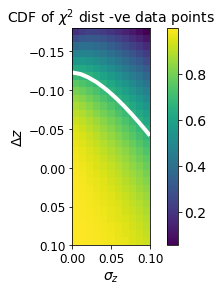

In [81]:
# Plot the cdf as a function of photo-z params
plt.figure()
#plt.imshow(cdf_grid[8:19,:], extent = [0.01, 0.1, 0, -0.1])#, aspect=2.0/3.0)
plt.imshow(cdf_grid_neg, extent = [0.0, 0.1, 0.1, -0.18])#, aspect=2.0/3.0)
plt.xlabel('$\sigma_z$', fontsize=14)
plt.ylabel('$\Delta z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('CDF of $\chi^2$ dist -ve data points', fontsize=14)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.contour(sigz, delz, cdf_grid_neg, [0.68], colors='#FFFFFF', linewidths=4)
#plt.savefig('./pvalues_w1halo_variableF_Planck18.png')
plt.show()